https://github.com/deejayrusso/Marketing-Mix-Model/tree/main

###  Data Dictionary:

| Column Name                     | Description                                                            | Data Type |
|--------------------------------|------------------------------------------------------------------------|-----------|
| `time.index`                   | Period index (weekly/monthly); tracks time progression                 | Integer   |
| `tv.volume`                    | Gross Rating Points or ad impressions for TV campaigns                 | Float     |
| `tv.spend`                     | Actual spend for TV advertising                                        | Float     |
| `search.clicks`               | Number of clicks from search advertising                               | Integer   |
| `search.imps`                  | Number of search impressions (ad views)                                | Integer   |
| `search.matching.query.volume` | Matching queries filtered through the ad platform                      | Integer   |
| `search.query.volume`          | Broader search queries across platforms                                | Integer   |
| `search.spend`                 | Spend on search advertising                                            | Float     |
| `total.spend`                  | Total media spend across all channels                                  | Float     |
| `brand.sales`                  | Units or revenue attributed to your brand                              | Integer   |
| `competitor.sales`            | Units or revenue from competitor brands                                | Integer   |
| `revenue`                      | Gross revenue during that time period                                  | Float     |
| `profit`                       | Net profit (likely revenue minus spend)                                | Float     |
| `tv.budget.index`             | Planning index for TV budgeting                                        | Integer   |
| `tv.budget`                    | Allocated TV budget                                                    | Float     |
| `search.budget.index`         | Planning index for search budgeting                                    | Integer   |
| `search.budget`                | Allocated search advertising budget                                    | Float     |


In [ ]:
# Common imports
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

# Data prep imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Model and evaluation imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MMM/ObservedData.csv").drop('Unnamed: 0',axis=1)

In [ ]:
df

,time.index,tv.volume,tv.spend,search.clicks,search.imps,search.matching.query.volume,search.query.volume,search.spend,total.spend,brand.sales,competitor.sales,revenue,profit,tv.budget.index,tv.budget,search.budget.index,search.budget
0,53,0,0.000000e+00,0,0,3925234,17454556,0.0,0.000000e+00,1464929,8149405,117194320,1.171943e+08,2,47500000.0,2,12000000.0
1,54,1089276931,5.446534e+06,344738,4385017,4385017,19495548,379211.8,5.825746e+06,1824453,9169015,145956240,1.401305e+08,2,47500000.0,2,12000000.0
2,55,0,0.000000e+00,327228,4202279,4202279,18674739,359950.8,3.599508e+05,1593647,8850791,127491760,1.271318e+08,2,47500000.0,2,12000000.0
3,56,779008559,3.894953e+06,398409,5005803,5005803,22248392,438249.9,4.333203e+06,2109265,10658782,168741200,1.644080e+08,2,47500000.0,2,12000000.0
4,57,0,0.000000e+00,407746,5105357,5105357,22689299,448520.6,4.485206e+05,1983664,11031917,158693120,1.582446e+08,2,47500000.0,2,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,204,163474748,8.172905e+05,819756,10242075,10242075,22766958,901731.6,1.719022e+06,2094281,11033694,167542480,1.658235e+08,4,45500000.0,4,24000000.0
152,205,0,0.000000e+00,772597,9725239,9725239,21610639,849856.7,8.498567e+05,1887266,10495242,150981280,1.501314e+08,4,45500000.0,4,24000000.0
153,206,0,0.000000e+00,821813,10298377,10298377,22880581,903994.3,9.039943e+05,2010091,11184512,160807280,1.599033e+08,4,45500000.0,4,24000000.0
154,207,692679752,3.463433e+06,776393,9763389,9763389,21707144,854032.3,4.317465e+06,2056498,10404483,164519840,1.602024e+08,4,45500000.0,4,24000000.0


In [ ]:
df.isnull().sum()

,0
time.index,0
tv.volume,0
tv.spend,0
search.clicks,0
search.imps,0
search.matching.query.volume,0
search.query.volume,0
search.spend,0
total.spend,0
brand.sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique().sort_values(ascending=False)

,0
time.index,156
search.query.volume,156
search.matching.query.volume,156
competitor.sales,156
brand.sales,156
profit,156
revenue,156
total.spend,144
search.imps,133
search.spend,133


In [ ]:
for name in df.columns:
  print(name)

time.index
tv.volume
tv.spend
search.clicks
search.imps
search.matching.query.volume
search.query.volume
search.spend
total.spend
brand.sales
competitor.sales
revenue
profit
tv.budget.index
tv.budget
search.budget.index
search.budget


/tmp/ipython-input-1076308343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["revenue"])


<Axes: xlabel='revenue', ylabel='Density'>

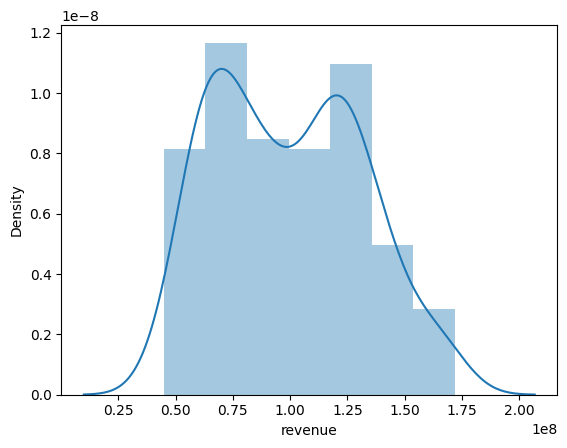

In [ ]:
sns.distplot(df["revenue"])

/tmp/ipython-input-661153056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["revenue"].apply(np.log))


<Axes: xlabel='revenue', ylabel='Density'>

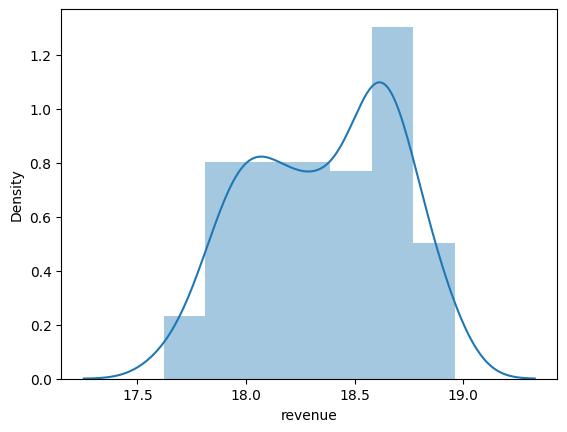

In [ ]:
sns.distplot(df["revenue"].apply(np.log))

/tmp/ipython-input-1630724764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revenue']**3)


<Axes: xlabel='revenue', ylabel='Density'>

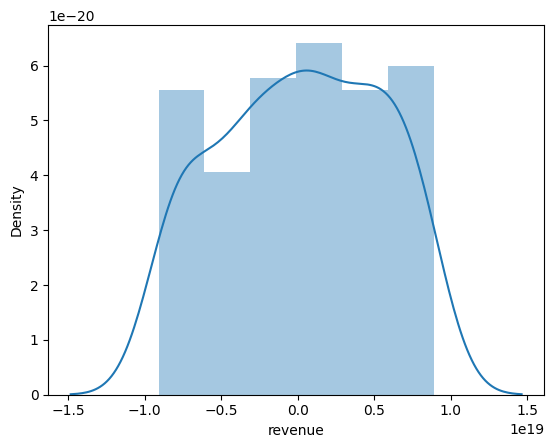

In [ ]:
sns.distplot(df['revenue']**3)

The distribution of the target variable seems somewhat normal but right skewed. Using a log transform did not make the distribution more normal, but using a 3rd order polynomial transofrmation did.

* The relationship between the target and its predictors may be nonlinear.

* A higher-order polynomial is capturing the nuances in the data better than log compression.

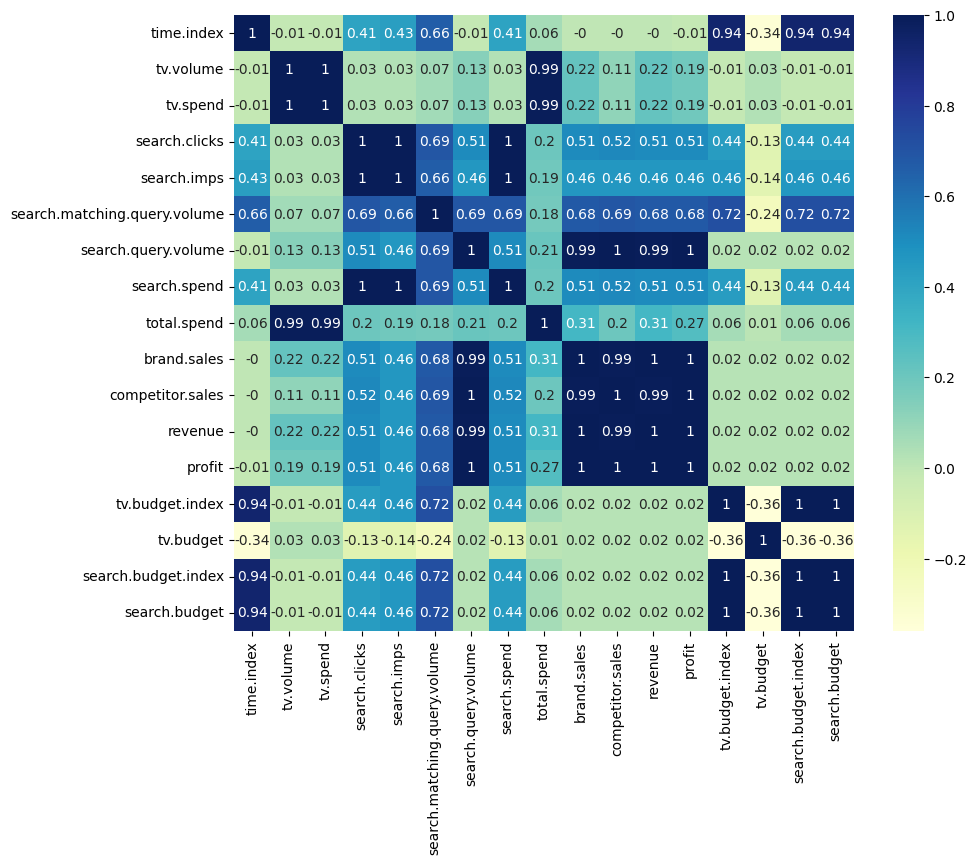

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(round(df.corr(),2), annot = True,cmap='YlGnBu')
plt.show()

# Select features and target variable for models
These models will attempt to predict revenue based on tv and search advertising spend. We will select only the marketing spend variables and revenue to use.

In [ ]:
# Create new data frame with variables intended to for use with models
sale_spend = df[['tv.spend', 'search.spend','revenue']]

In [ ]:
sale_spend['search_spend']=sale_spend['search.spend']
sale_spend['tv_spend']=sale_spend['tv.spend']
sale_spend.drop(['tv.spend','search.spend'],axis=1,inplace=True)
sale_spend=sale_spend[['tv_spend','search_spend','revenue']]

/tmp/ipython-input-2460705673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_spend['search_spend']=sale_spend['search.spend']
/tmp/ipython-input-2460705673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_spend['tv_spend']=sale_spend['tv.spend']
/tmp/ipython-input-2460705673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [ ]:
# Check shape and top 5 rows
print(sale_spend.shape)
sale_spend.head()

(156, 3)


,tv_spend,search_spend,revenue
0,0.000000e+00,0.0,117194320
1,5.446534e+06,379211.8,145956240
2,0.000000e+00,359950.8,127491760
3,3.894953e+06,438249.9,168741200
4,0.000000e+00,448520.6,158693120


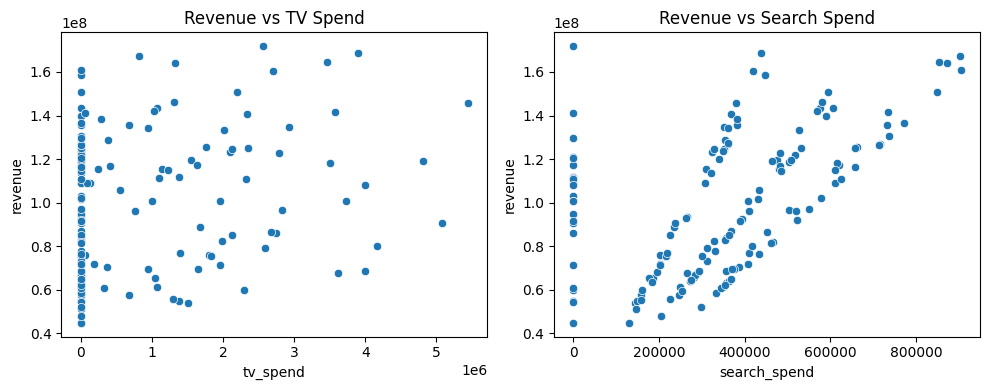

In [ ]:
# We can visualize the relationships between the advertising spend variables and revenue to confirm the insights from the correlation matrix.
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tv_spend', y='revenue', data=sale_spend)
plt.title('Revenue vs TV Spend')

plt.subplot(1, 2, 2)
sns.scatterplot(x='search_spend', y='revenue', data=sale_spend)
plt.title('Revenue vs Search Spend')

plt.tight_layout()
plt.show()

# Feature Engineering
## Some new features will be created to account for seasonality and other trends:

* tv.spend, search.spend, and revenue are shifted 52 weeks to create one year lag variables (_lag1y) for seasonality.
* Revenue will also be shifted one week (_lag1w) and three months (lag3m) to explore effects of delayed purchase after interacting with an advertisement.
* To explore advertising trends, rolling averages for both tv.spend and search.spend are calculated for one week (_p1w), three months (_p3m) , and one year (_p1y).


In [ ]:
# Create lag variables for 1y for revenue and channels to look for seasonality
sale_spend = pd.concat([sale_spend, sale_spend.shift(52).add_suffix('_lag1y')], axis=1)

sale_spend['revenue_lag1w'] = sale_spend['revenue'].shift()
sale_spend['revenue_lag3m'] = sale_spend['revenue'].shift(13)

# Create rolling average variable for 1y, 3m, and 1w for all channel spend
sale_spend = pd.concat([sale_spend, sale_spend.rolling(1).mean().add_suffix('_p1w'),
                        sale_spend.rolling(13).mean().add_suffix('_p3m'),
                        sale_spend.rolling(52).mean().add_suffix('_p1y')], axis=1)

# Check shape and top 5 rows
print(sale_spend.shape)
sale_spend.head()

(156, 32)


,tv_spend,search_spend,revenue,tv_spend_lag1y,search_spend_lag1y,revenue_lag1y,revenue_lag1w,revenue_lag3m,tv_spend_p1w,search_spend_p1w,...,revenue_lag1w_p3m,revenue_lag3m_p3m,tv_spend_p1y,search_spend_p1y,revenue_p1y,tv_spend_lag1y_p1y,search_spend_lag1y_p1y,revenue_lag1y_p1y,revenue_lag1w_p1y,revenue_lag3m_p1y
0,0.000000e+00,0.0,117194320,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.446534e+06,379211.8,145956240,NaN,NaN,NaN,117194320.0,NaN,5.446534e+06,379211.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000e+00,359950.8,127491760,NaN,NaN,NaN,145956240.0,NaN,0.000000e+00,359950.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.894953e+06,438249.9,168741200,NaN,NaN,NaN,127491760.0,NaN,3.894953e+06,438249.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000e+00,448520.6,158693120,NaN,NaN,NaN,168741200.0,NaN,0.000000e+00,448520.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sale_spend.dtypes

,0
tv_spend,float64
search_spend,float64
revenue,int64
tv_spend_lag1y,float64
search_spend_lag1y,float64
revenue_lag1y,float64
revenue_lag1w,float64
revenue_lag3m,float64
tv_spend_p1w,float64
search_spend_p1w,float64


In [ ]:
# Drop extra columns generated from column shift and concatenation

sale_spend = sale_spend.loc[:, ~sale_spend.columns.duplicated()]
sale_spend.drop(['revenue_p1w', 'revenue_p3m', 'revenue_p1y'], axis=1, inplace=True)
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1y')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p1y')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p1y')]

In [ ]:
# Check shape and top 5 rows

print(sale_spend.shape)
sale_spend.head()

(156, 14)


,tv_spend,search_spend,revenue,tv_spend_lag1y,search_spend_lag1y,revenue_lag1y,revenue_lag1w,revenue_lag3m,tv_spend_p1w,search_spend_p1w,tv_spend_p3m,search_spend_p3m,tv_spend_p1y,search_spend_p1y
0,0.000000e+00,0.0,117194320,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.0,NaN,NaN,NaN,NaN
1,5.446534e+06,379211.8,145956240,NaN,NaN,NaN,117194320.0,NaN,5.446534e+06,379211.8,NaN,NaN,NaN,NaN
2,0.000000e+00,359950.8,127491760,NaN,NaN,NaN,145956240.0,NaN,0.000000e+00,359950.8,NaN,NaN,NaN,NaN
3,3.894953e+06,438249.9,168741200,NaN,NaN,NaN,127491760.0,NaN,3.894953e+06,438249.9,NaN,NaN,NaN,NaN
4,0.000000e+00,448520.6,158693120,NaN,NaN,NaN,168741200.0,NaN,0.000000e+00,448520.6,NaN,NaN,NaN,NaN


In [ ]:
sale_spend.isnull().sum()

,0
tv_spend,0
search_spend,0
revenue,0
tv_spend_lag1y,52
search_spend_lag1y,52
revenue_lag1y,52
revenue_lag1w,1
revenue_lag3m,13
tv_spend_p1w,0
search_spend_p1w,0


In [ ]:
sale_spend.dropna(inplace=True)

In [ ]:
sale_spend.shape

(104, 14)

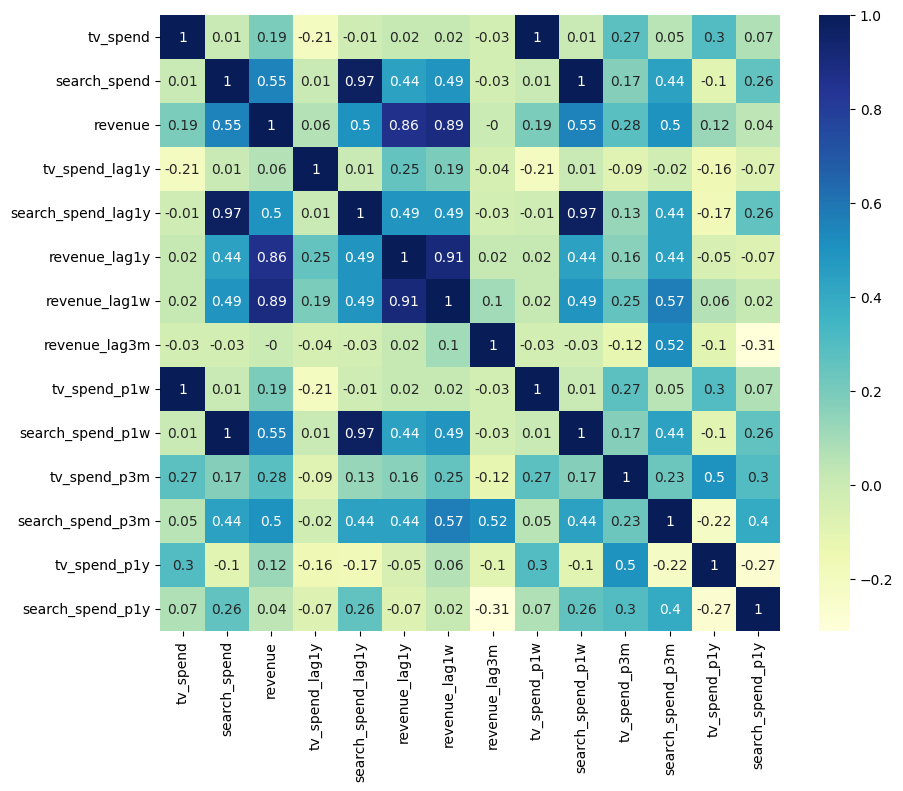

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(round(sale_spend.corr(),2), annot = True,cmap='YlGnBu')
plt.show()

In [ ]:
# Remove '_p1w' variables due to high correlation (corr = 1).

sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_p1w')]

In [ ]:
# Check shape and top 5 rows

print(sale_spend.shape)
sale_spend.head()

(104, 12)


,tv_spend,search_spend,revenue,tv_spend_lag1y,search_spend_lag1y,revenue_lag1y,revenue_lag1w,revenue_lag3m,tv_spend_p3m,search_spend_p3m,tv_spend_p1y,search_spend_p1y
52,2.556818e+06,0.0,171843920,0.000000e+00,0.0,117194320.0,120768960.0,111486400.0,777932.265331,285979.946154,962631.108189,232345.363462
53,0.000000e+00,606416.8,143530400,5.446534e+06,379211.8,145956240.0,171843920.0,109101120.0,768112.356477,309056.169231,857890.068903,236714.690385
54,1.068467e+06,575487.0,143586160,0.000000e+00,359950.8,127491760.0,143530400.0,115684320.0,762469.913254,329523.530769,878437.501642,240859.617308
55,0.000000e+00,516824.0,122031200,3.894953e+06,438249.9,168741200.0,143586160.0,93143920.0,762469.913254,348965.946154,803534.552599,242370.657692
56,1.023443e+06,569357.8,142010400,0.000000e+00,448520.6,158693120.0,122031200.0,113742880.0,841196.277212,368035.038462,823216.143588,244694.450000


# Prepare data for pipeline

In [ ]:
# Separate target and independant variables

X = sale_spend.drop('revenue',axis=1)
y = sale_spend['revenue']

In [ ]:
# For each X, calculate VIF and save in dataframe

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
# View VIF dataframe

vif.round(1)

,Features,VIF Factor
0,tv_spend,1.7
1,search_spend,74.7
2,tv_spend_lag1y,1.7
3,search_spend_lag1y,76.6
4,revenue_lag1y,79.1
5,revenue_lag1w,102.0
6,revenue_lag3m,43.5
7,tv_spend_p3m,23.0
8,search_spend_p3m,99.3
9,tv_spend_p1y,108.4


In [ ]:
# Create decision tree to help determine feature importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

<Axes: >

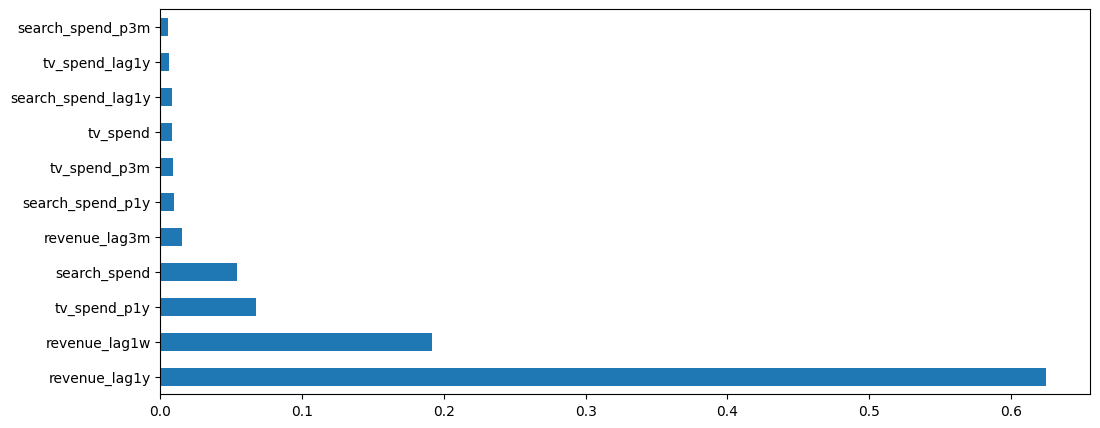

In [ ]:
# Visualize feature importance based on decision tree

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(12,5))

In [ ]:
# Make sure dataframes are compatible shapes

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(72, 11) (32, 11)
(72,) (32,)


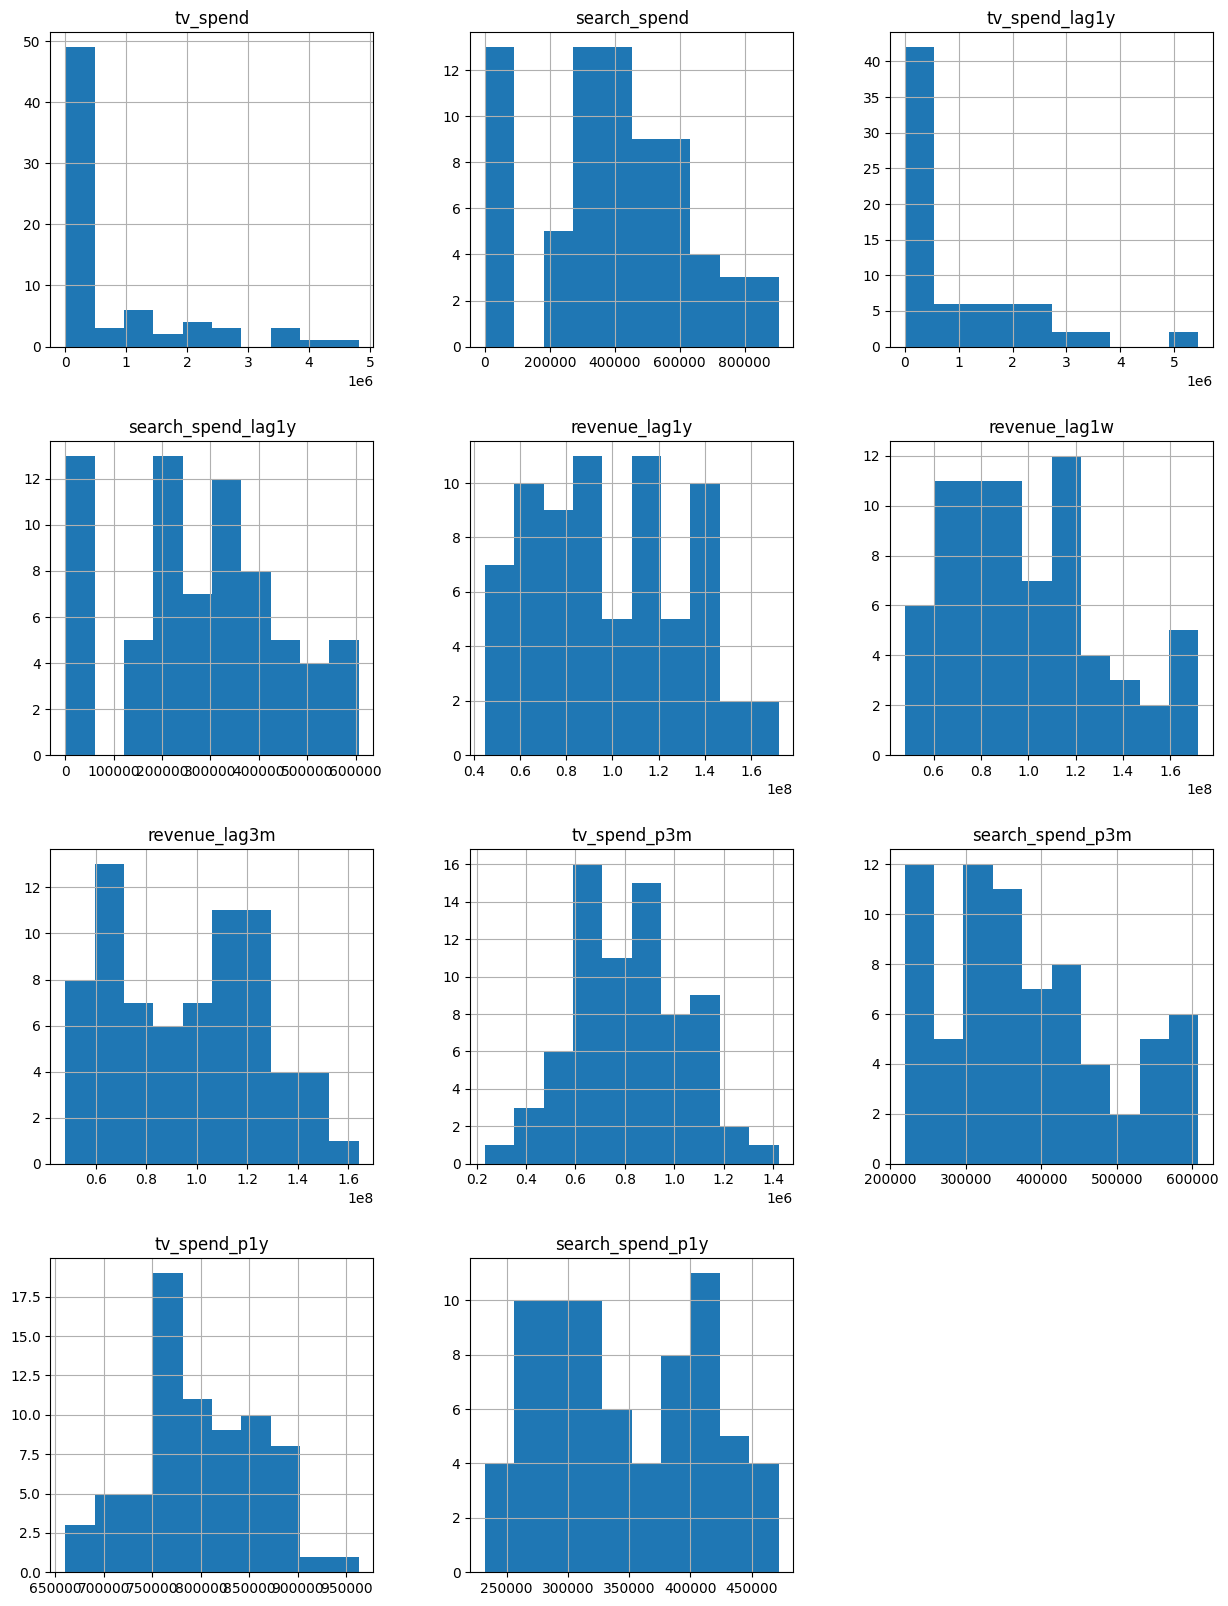

In [ ]:
# View training feature distribution before transform

X_train.hist(figsize=(15,20))
plt.show()

In [ ]:
scaler = StandardScaler()
distributor = PowerTransformer(method='yeo-johnson', standardize=False)

pipeline = Pipeline(steps=[
    ('scaler', scaler),    #scale numbers to same magnitude before normalizing distribution
    ('pt', distributor)    #transform numbers to more gaussian-like distribution
])

In [ ]:
# Fit_transform train data with preprocessor

train_x = pipeline.fit_transform(X_train)

print(train_x.shape)
# train_x

(72, 11)


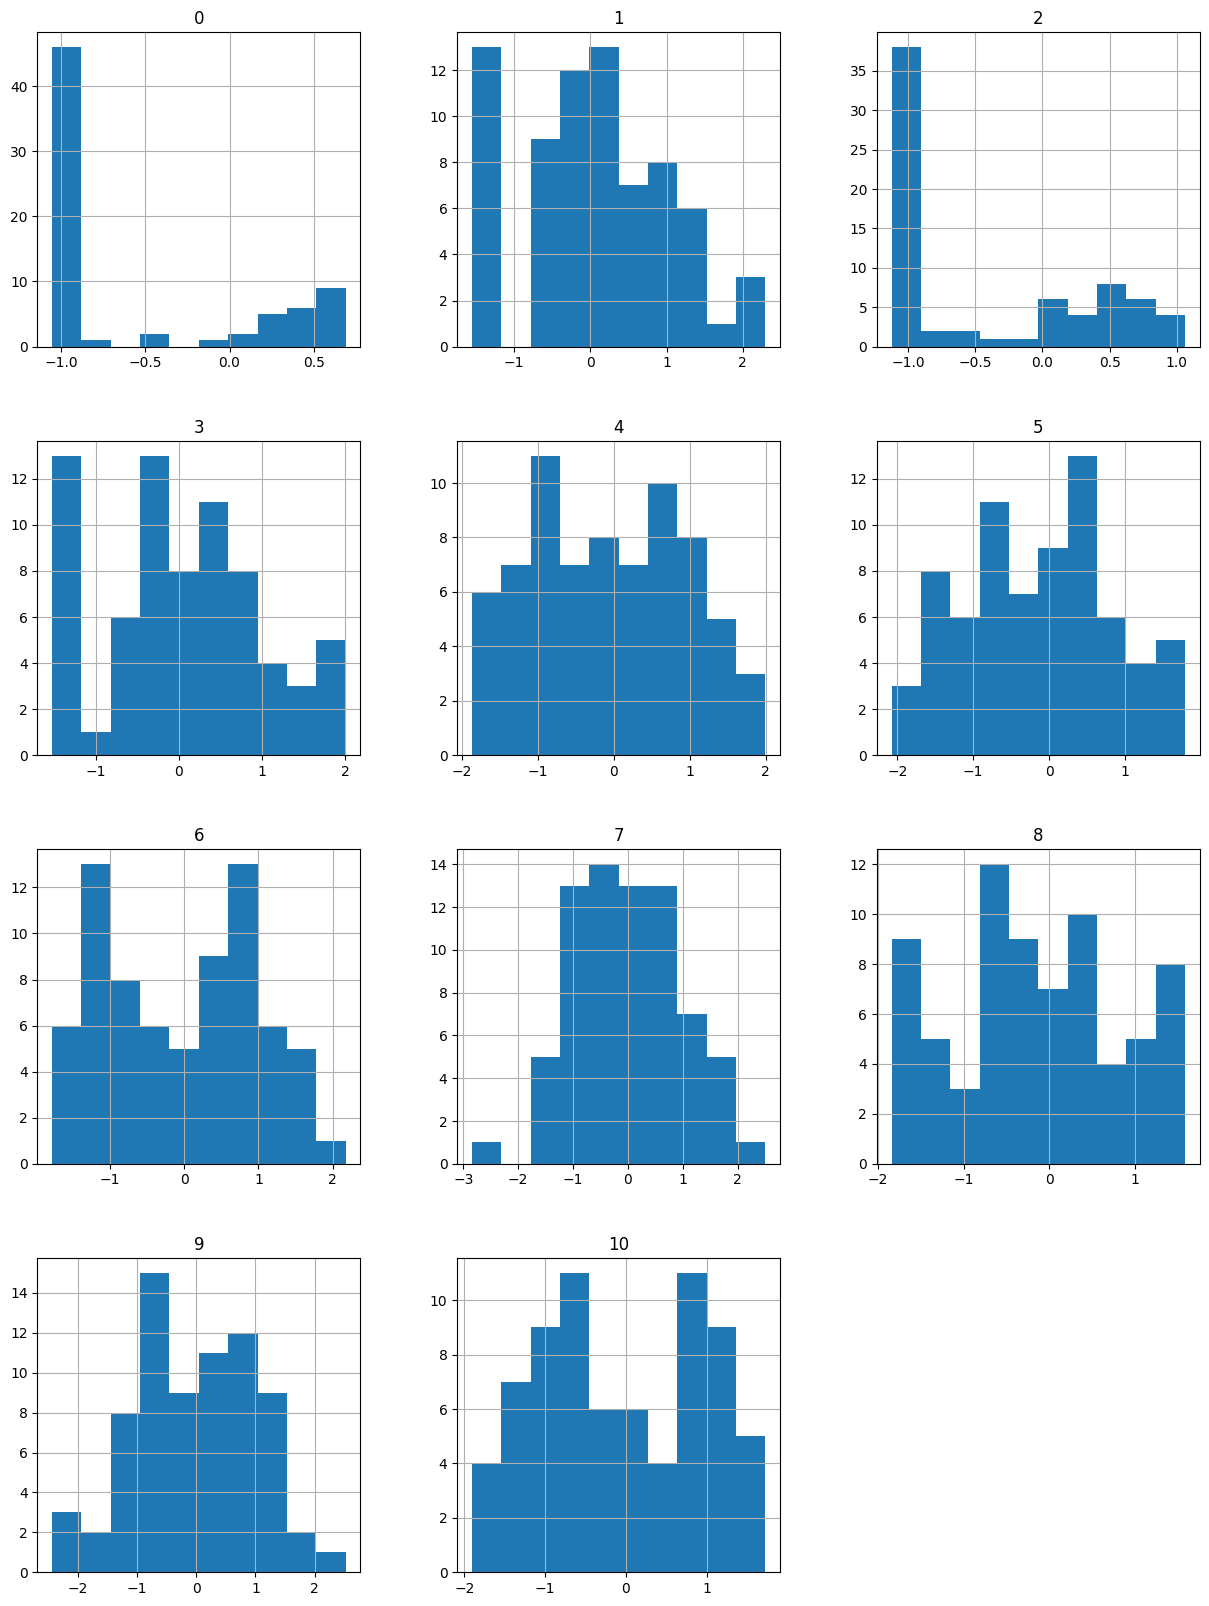

In [ ]:
# View training feature distribution after transform

train_x_df = pd.DataFrame(train_x)

train_x_df.hist(figsize=(15,20))
plt.show()

In [ ]:
# Transform the test data

test_x = pipeline.transform(X_test)

print(test_x.shape)
# test_x

(32, 11)


# Baseline

In [ ]:
# Calculate mean revenue

mean_value = np.mean(y_train)

mean_value

np.float64(98667211.1111111)

In [ ]:
# Predict all values as the mean

base_pred = np.repeat(mean_value, len(y_test))

base_pred

array([98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111, 98667211.1111111,
       98667211.1111111, 98667211.1111111])

In [ ]:
# Calculate error to establish baseline measurements

base_mse = mean_squared_error(y_test, base_pred)

base_rmse = np.sqrt(base_mse)
base_mape = mean_absolute_percentage_error(y_test, base_pred)
base_r_sq = r2_score(y_test, base_pred)

print('Baseline RMSE: {}' .format(base_rmse))
print('Baseline MAPE: {}' .format(base_mape))
print('Baseline R2: {}' .format(base_r_sq))

Baseline RMSE: 32350200.101869214
Baseline MAPE: 0.3080689065045069
Baseline R2: -0.005206233767016011


# Linear Regression

In [ ]:
# Split original dataframe to train/test

y_all = df['revenue']
x_all = df.loc[:, df.columns != 'revenue']


x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=.3, random_state=0)

In [ ]:
# Kitchen sink linear regression model from original dataframe

lr_model = LinearRegression()

lr_model.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
#Train RMSE

reg_train_pred = lr_model.predict(x_train_all)

lr_train_mse = mean_squared_error(y_train_all, reg_train_pred)
lr_train_rmse = np.sqrt(mean_squared_error (y_train_all, reg_train_pred))

lr_train_mape = mean_absolute_percentage_error(y_train_all, reg_train_pred)
lr_train_r_sq = r2_score(y_train_all, reg_train_pred)

print('Train RMSE: {}' .format(lr_train_rmse))
print('Train MAPE: {}' .format(lr_train_mape))
print('Train R2: {}' .format(lr_train_r_sq))

Train RMSE: 1.8058944241027927e-07
Train MAPE: 1.3059431741042813e-15
Train R2: 1.0


In [ ]:
#Test RMSE

reg_test_pred = lr_model.predict(x_test_all)

lr_test_mse = mean_squared_error (y_test_all, reg_test_pred)

lr_test_rmse = np.sqrt(mean_squared_error (y_test_all, reg_test_pred))
lr_test_mape = mean_absolute_percentage_error(y_test_all, reg_test_pred)
lr_test_r_sq = r2_score(y_test_all, reg_test_pred)


print('Test RMSE: {}' .format(lr_test_rmse))
print('Test MAPE: {}' .format(lr_test_mape))
print('Test R2: {}' .format(lr_test_r_sq))

Test RMSE: 1.7804940804828446e-07
Test MAPE: 1.3200801617431644e-15
Test R2: 1.0


# Linear Regression Simplified

In [ ]:
# Create train/ test variables using only two features: tv.spend and search.spend

y_simple = df['revenue']
x_simple = df[['tv.spend','search.spend']]


x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, test_size=.3, random_state=0)

In [ ]:
# Fit previously instantiated LR model on simplified data

lr_model.fit(x_train_simple, y_train_simple)

LinearRegression()

In [ ]:
#Train RMSE

reg_train_pred = lr_model.predict(x_train_simple)

lrsimp_train_mse = mean_squared_error(y_train_simple, reg_train_pred)
lrsimp_train_rmse = np.sqrt(mean_squared_error (y_train_simple, reg_train_pred))
lrsimp_train_mape = mean_absolute_percentage_error(y_train_simple, reg_train_pred)
lrsimp_train_r_sq = r2_score(y_train_simple, reg_train_pred)

print('Train RMSE: {}' .format(lrsimp_train_rmse))
print('Train MAPE: {}' .format(lrsimp_train_mape))
print('Train R2: {}' .format(lrsimp_train_r_sq))

Train RMSE: 28011177.317391858
Train MAPE: 0.2729072708904673
Train R2: 0.2545513260172919


In [ ]:
#Test RMSE

reg_test_pred = lr_model.predict(x_test_simple)

lrsimp_test_mse = mean_squared_error(y_test_simple, reg_test_pred)
lrsimp_test_rmse = np.sqrt(mean_squared_error (y_test_simple, reg_test_pred))
lrsimp_test_mape = mean_absolute_percentage_error(y_test_simple, reg_test_pred)
lrsimp_test_r_sq = r2_score(y_test_simple, reg_test_pred)

print('test RMSE: {}' .format(lrsimp_test_rmse))
print('test MAPE: {}' .format(lrsimp_test_mape))
print('test R2: {}' .format(lrsimp_test_r_sq))

test RMSE: 23300652.96250886
test MAPE: 0.24155755186895217
test R2: 0.4233070244876658


# Linear Regression with lag variables

In [ ]:
# Linear model - spend and lag/rolling avg variables

lr_lagmodel = LinearRegression()

lr_lagmodel.fit(train_x, y_train)

LinearRegression()

In [ ]:
#Train RMSE

reg_train_pred = lr_lagmodel.predict(train_x)

lrlag_train_mse = mean_squared_error(y_train, reg_train_pred)
lrlag_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
lrlag_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
lrlag_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(lrlag_train_rmse))
print('Train MAPE: {}' .format(lrlag_train_mape))
print('Train R2: {}' .format(lrlag_train_r_sq))

Train RMSE: 7582032.814900094
Train MAPE: 0.05150584150573545
Train R2: 0.9391150686422542


In [ ]:
#Test RMSE

reg_test_pred = lr_lagmodel.predict(test_x)

lrlag_test_mse = mean_squared_error (y_test, reg_test_pred)
lrlag_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
lrlag_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
lrlag_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(lrlag_test_rmse))
print('Test MAPE: {}' .format(lrlag_test_mape))
print('Test R2: {}' .format(lrlag_test_r_sq))

Test RMSE: 7071079.505626688
Test MAPE: 0.054165981526239436
Test R2: 0.9519744141624403


# Polynomial Regression

In [ ]:
# Create third degree terms and interaction terms

poly_features = PolynomialFeatures(degree=3).fit(train_x)

# Transform train and test features using fit transformer
train_x_poly = poly_features.transform(train_x)

test_x_poly = poly_features.transform(test_x)

In [ ]:
# Instantiate and fit model using poly_features transformation

pol_lin_reg = LinearRegression()

pol_lin_reg.fit(train_x_poly, y_train)

LinearRegression()

In [ ]:
#Train RMSE

reg_train_pred = pol_lin_reg.predict(train_x_poly)

poly_train_mse = mean_squared_error(y_train, reg_train_pred)
poly_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
poly_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
poly_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(poly_train_rmse))
print('Train MAPE: {}' .format(poly_train_mape))
print('Train R2: {}' .format(poly_train_r_sq))

Train RMSE: 5.7625048608442676e-08
Train MAPE: 5.041083866287414e-16
Train R2: 1.0


In [ ]:
#Test RMSE

reg_test_pred = pol_lin_reg.predict(test_x_poly)

poly_test_mse = mean_squared_error (y_test, reg_test_pred)
poly_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
poly_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
poly_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(poly_test_rmse))
print('Test MAPE: {}' .format(poly_test_mape))
print('Test R2: {}' .format(poly_test_r_sq))

Test RMSE: 16951185.76566041
Test MAPE: 0.1332023303378045
Test R2: 0.7240048838734685


# Lasso Regression

In [ ]:
# Lasso Regression to help with multicolinearity of variables

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

lasso_reg = LassoCV(alphas=arange(0.0001,1,0.001), cv=cv, n_jobs=-1, max_iter=5000)

lasso_reg.fit(train_x, y_train)

LassoCV(alphas=array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.210e-0...
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        max_iter=5000, n_jobs=-1)

In [ ]:
# See how many iterations completed before stopping

print("Convergence occured at {} iterations." .format(lasso_reg.n_iter_))

# See alpha used

print('An alpha of {} was used.' .format(lasso_reg.alpha_))

Convergence occured at 357 iterations.
An alpha of 0.9991 was used.


In [ ]:
#Train RMSE

reg_train_pred = lasso_reg.predict(train_x)

lasso_train_mse = mean_squared_error(y_train, reg_train_pred)
lasso_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
lasso_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
lasso_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(lasso_train_rmse))
print('Train MAPE: {}' .format(lasso_train_mape))
print('Train R2: {}' .format(lasso_train_r_sq))

Train RMSE: 7582032.814908322
Train MAPE: 0.05150585231288005
Train R2: 0.9391150686421221


In [ ]:
#Test RMSE

reg_test_pred = lasso_reg.predict(test_x)

lasso_test_mse = mean_squared_error(y_test, reg_test_pred)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, reg_test_pred))
lasso_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
lasso_test_mae = mean_absolute_error(y_test, reg_test_pred)
lasso_test_r_sq = r2_score(y_test, reg_test_pred)

print('Test RMSE: {}' .format(lasso_test_rmse))
print('Test MAPE: {}' .format(lasso_test_mape))
print('Test MAE: {}' .format(lasso_test_mae))
print('Test R2: {}' .format(lasso_test_r_sq))

Test RMSE: 7071077.742740517
Test MAPE: 0.05416595829622783
Test MAE: 5131635.5870465655
Test R2: 0.9519744381088917


# Ridge Regression

In [ ]:
# Instantiate and fit ridge regression model

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

ridge_reg = RidgeCV(alphas=arange(0.0001,1,0.001), cv=cv)

ridge_reg.fit(train_x, y_train)

RidgeCV(alphas=array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.210e-0...
       9.661e-01, 9.671e-01, 9.681e-01, 9.691e-01, 9.701e-01, 9.711e-01,
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1))

In [ ]:
# See alpha used

print('An alpha of {} was used.' .format(ridge_reg.alpha_))

An alpha of 0.056100000000000004 was used.


In [ ]:
#Train RMSE

reg_train_pred = ridge_reg.predict(train_x)

ridge_train_mse = mean_squared_error(y_train, reg_train_pred)
ridge_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
ridge_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
ridge_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(ridge_train_rmse))
print('Train MAPE: {}' .format(ridge_train_mape))
print('Train R2: {}' .format(ridge_train_r_sq))

Train RMSE: 7586378.907894684
Train MAPE: 0.05203242871895778
Train R2: 0.9390452489991477


In [ ]:
#Test RMSE

reg_test_pred = ridge_reg.predict(test_x)

ridge_test_mse = mean_squared_error (y_test, reg_test_pred)
ridge_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
ridge_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
ridge_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(ridge_test_rmse))
print('Test MAPE: {}' .format(ridge_test_mape))
print('Test R2: {}' .format(ridge_test_r_sq))

Test RMSE: 7080237.841652808
Test MAPE: 0.05411550833636283
Test R2: 0.9518499298356923


# Elastic Net

In [ ]:
# Instantiate and fit elastic net model

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

elastic_net = ElasticNetCV(l1_ratio=0.5, alphas=arange(0.0001,1,0.001), cv=cv, max_iter=5000)

elastic_net.fit(train_x, y_train)

ElasticNetCV(alphas=array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.2...
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01]),
             cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
             max_iter=5000)

In [ ]:
# See how many iterations completed before stopping

print("Convergence occured at {} iterations." .format(elastic_net.n_iter_))

Convergence occured at 480 iterations.


In [ ]:
#Train RMSE

reg_train_pred = elastic_net.predict(train_x)

en_train_mse = mean_squared_error(y_train, reg_train_pred)
en_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
en_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
en_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(en_train_rmse))
print('Train MAPE: {}' .format(en_train_mape))
print('Train R2: {}' .format(en_train_r_sq))

Train RMSE: 7589748.7499011
Train MAPE: 0.05223132197153968
Train R2: 0.9389910852133347


In [ ]:
#Test RMSE

reg_test_pred = elastic_net.predict(test_x)

en_test_mse = mean_squared_error (y_test, reg_test_pred)
en_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
en_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
en_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(en_test_rmse))
print('Test MAPE: {}' .format(en_test_mape))
print('Test R2: {}' .format(en_test_r_sq))

Test RMSE: 7085549.004110765
Test MAPE: 0.05409778072658913
Test R2: 0.9517776642513107


# Stochastic Gradient Regressor

In [ ]:
# Instantiate and fit SGD regressor

sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.1, tol=0.0001)

sgd_reg.fit(train_x, y_train)

SGDRegressor(eta0=0.1, max_iter=100, penalty=None, tol=0.0001)

In [ ]:
# See how many iterations completed before stopping

print("Convergence occured at {} iterations." .format(sgd_reg.n_iter_))

Convergence occured at 29 iterations.


In [ ]:
#Train RMSE

reg_train_pred = sgd_reg.predict(train_x)

sgd_train_mse = mean_squared_error(y_train, reg_train_pred)
sgd_train_rmse = np.sqrt(mean_squared_error (y_train, reg_train_pred))
sgd_train_mape = mean_absolute_percentage_error(y_train, reg_train_pred)
sgd_train_r_sq = r2_score(y_train, reg_train_pred)

print('Train RMSE: {}' .format(sgd_train_rmse))
print('Train MAPE: {}' .format(sgd_train_mape))
print('Train R2: {}' .format(sgd_train_r_sq))

Train RMSE: 8017866.071543945
Train MAPE: 0.06053598867474768
Train R2: 0.9319142702599629


In [ ]:
#Test RMSE

reg_test_pred = sgd_reg.predict(test_x)

sgd_test_mse = mean_squared_error (y_test, reg_test_pred)
sgd_test_rmse = np.sqrt(mean_squared_error (y_test, reg_test_pred))
sgd_test_mape = mean_absolute_percentage_error(y_test, reg_test_pred)
sgd_test_r_sq = r2_score(y_test, reg_test_pred)


print('Test RMSE: {}' .format(sgd_test_rmse))
print('Test MAPE: {}' .format(sgd_test_mape))
print('Test R2: {}' .format(sgd_test_r_sq))

Test RMSE: 7599730.756745379
Test MAPE: 0.05592444490054484
Test R2: 0.9445249575461777


In [ ]:
# Add metrics to model_eval dictionary.

model_eval = {
    'lin_reg_lag': [{'RMSE': lrlag_test_rmse},{'Train MAPE': lrlag_train_mape}, {'Test MAPE': lrlag_test_mape}, {'R2': lrlag_test_r_sq }],
    'elastic_net' : [{'RMSE': en_test_rmse},{'Train MAPE': en_train_mape}, {'Test MAPE': en_test_mape}, {'R2': en_test_r_sq }],
    'SGD' : [{'RMSE': sgd_test_rmse},{'Train MAPE': sgd_train_mape}, {'Test MAPE': sgd_test_mape}, {'R2': sgd_test_r_sq }],
    'lasso' : [{'RMSE': lasso_test_rmse},{'Train MAPE': lasso_train_mape}, {'Test MAPE': lasso_test_mape}, {'R2': lasso_test_r_sq }],
    'ridge' : [{'RMSE': ridge_test_rmse},{'Train MAPE':ridge_train_mape}, {'Test MAPE': ridge_test_mape}, {'R2': ridge_test_r_sq }]
}

# Create data frame from dictionary
model_evaldf = pd.DataFrame.from_dict(model_eval)

model_evaldf

,lin_reg_lag,elastic_net,SGD,lasso,ridge
0,{'RMSE': 7071079.505626688},{'RMSE': 7085549.004110765},{'RMSE': 7599730.756745379},{'RMSE': 7071077.742740517},{'RMSE': 7080237.841652808}
1,{'Train MAPE': 0.05150584150573545},{'Train MAPE': 0.05223132197153968},{'Train MAPE': 0.06053598867474768},{'Train MAPE': 0.05150585231288005},{'Train MAPE': 0.05203242871895778}
2,{'Test MAPE': 0.054165981526239436},{'Test MAPE': 0.05409778072658913},{'Test MAPE': 0.05592444490054484},{'Test MAPE': 0.05416595829622783},{'Test MAPE': 0.05411550833636283}
3,{'R2': 0.9519744141624403},{'R2': 0.9517776642513107},{'R2': 0.9445249575461777},{'R2': 0.9519744381088917},{'R2': 0.9518499298356923}


In [ ]:
# See lambdas used by PowerTransformer to normalize features.

print(pipeline['pt'].lambdas_)
print(pipeline['pt'].n_features_in_)

[-1.2247575   1.09137273 -0.50993191  1.07137437  0.81386982  0.61322566
  0.88985704  0.89324556  0.58045869  0.89406196  0.82043131]
11


In [ ]:
# Create dataframe and concatenate column headers and lambda values

lambdas = pd.DataFrame()
lambdas["Features"] = X_train.columns
lambdas["lambda"] = pipeline['pt'].lambdas_

lambdas

,Features,lambda
0,tv_spend,-1.224758
1,search_spend,1.091373
2,tv_spend_lag1y,-0.509932
3,search_spend_lag1y,1.071374
4,revenue_lag1y,0.813870
5,revenue_lag1w,0.613226
6,revenue_lag3m,0.889857
7,tv_spend_p3m,0.893246
8,search_spend_p3m,0.580459
9,tv_spend_p1y,0.894062


In [ ]:
# Lasso regression coefficients

lasso_coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso_reg.coef_.round(2)))], axis = 1)

print(lasso_reg.intercept_)
lasso_coef

103476474.83276318


,0,0
0,tv_spend,7622498.21
1,search_spend,36572106.24
2,tv_spend_lag1y,-4013869.33
3,search_spend_lag1y,-34070660.52
4,revenue_lag1y,22826357.85
5,revenue_lag1w,5837585.26
6,revenue_lag3m,1055034.43
7,tv_spend_p3m,-2945600.90
8,search_spend_p3m,92734.70
9,tv_spend_p1y,3444902.78
